In [11]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.cosmology import Planck18

In [12]:
plt.style.use("dstyle")
_ = plt.figure()
plt.style.use("dstyle")

<Figure size 3000x2400 with 0 Axes>

In [13]:
table_fname_Planck2018 = "planck/table_Planck2018.txt"

table_Planck2018 = np.loadtxt(table_fname_Planck2018, skiprows=10, delimiter = ',')

In [14]:
def omegaR(omegaM, z_eq):
    return omegaM / (1 + z_eq)

# https://arxiv.org/pdf/1807.06209 - table 2
omegaM_Planck = 0.3111
zeq_Planck = 3387

print(f"OmegaR for Planck is: {omegaR(omegaM_Planck, zeq_Planck):.10f} ")

OmegaR for Planck is: 0.0000918241 


In [15]:
z_arr = table_Planck2018[:,0]
l_z_arr = table_Planck2018[:,1]
a_arr = table_Planck2018[:,2]

time_look_arr = table_Planck2018[:,3]
time_age_arr = table_Planck2018[:,4]
time_conf_arr = table_Planck2018[:,5]
time_confage_arr = table_Planck2018[:,6]

dist_lum_arr = table_Planck2018[:,7]
dist_comov_LOS_arr = table_Planck2018[:,8]
dist_comov_trans_arr = table_Planck2018[:,9]
dist_angdiam_arr = table_Planck2018[:,10]
dist_mod_arr = table_Planck2018[:,11]

hubble_arr = table_Planck2018[:,12]
density_arr = table_Planck2018[:,13]

In [16]:
cosmo = Planck18

dist_comoving_astropy = np.zeros_like(z_arr)
dist_mod_astropy = np.zeros_like(z_arr)
dist_angdiam_astropy = np.zeros_like(z_arr)

time_age_astropy = np.zeros_like(z_arr)
time_look_astropy = np.zeros_like(z_arr)

a_arr_astropy = np.zeros_like(z_arr)

for i, z in enumerate(z_arr):
    
    dist_comoving_astropy[i] = cosmo.comoving_distance(z).value
    dist_angdiam_astropy[i] = cosmo.angular_diameter_distance(z).value
    dist_mod_astropy[i] = cosmo.distmod(z).value
    
    time_age_astropy[i] = (cosmo.age(z_arr[i]) * cosmo.H0).cgs
    time_look_astropy[i] = (cosmo.lookback_time(z_arr[i]) * cosmo.H0).cgs
    
    a_arr_astropy[i] = cosmo.scale_factor(z_arr[i])

print(cosmo)

FlatLambdaCDM(name="Planck18", H0=67.7 km / (Mpc s), Om0=0.31, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.049)


## Test 1 - Angular Diameter Distance

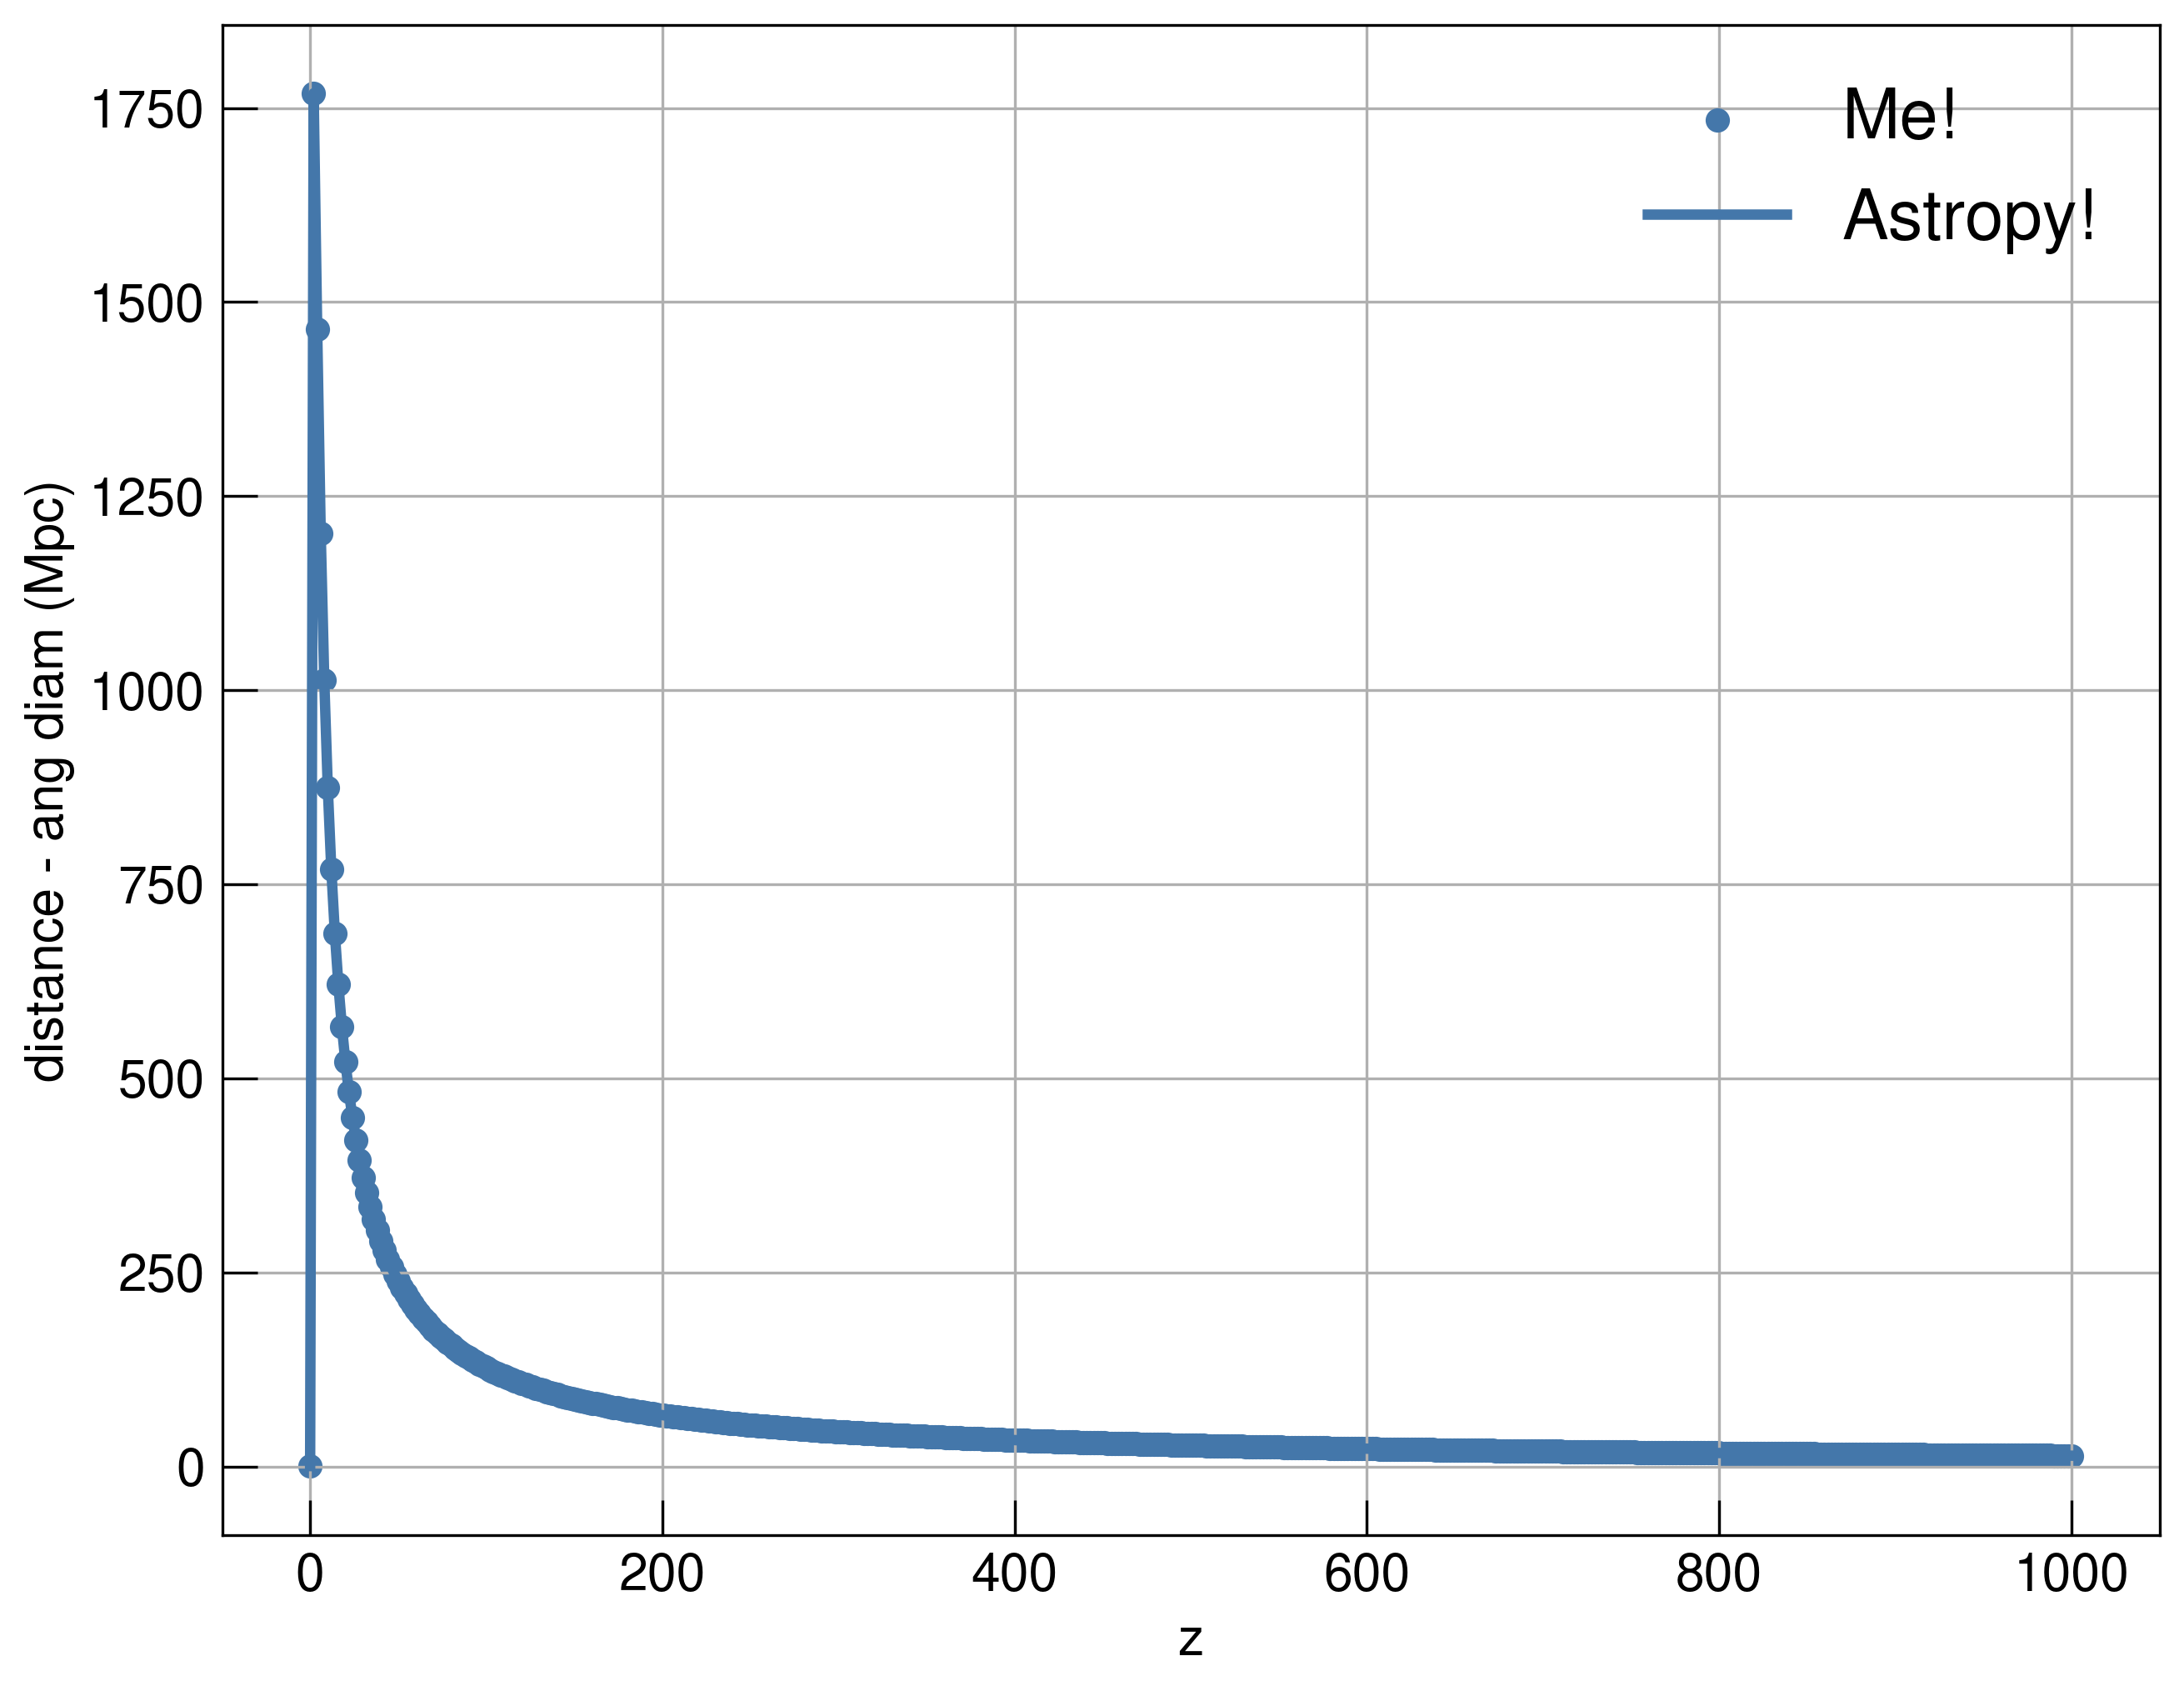

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(z_arr, dist_angdiam_arr, label='Me!')
ax.plot(z_arr, dist_angdiam_astropy, label='Astropy!')

ax.set_xlabel("z")
ax.set_ylabel("distance - ang diam (Mpc)")

ax.grid()

plt.legend()

Text(0.5, 1.0, 'Fractional Error')

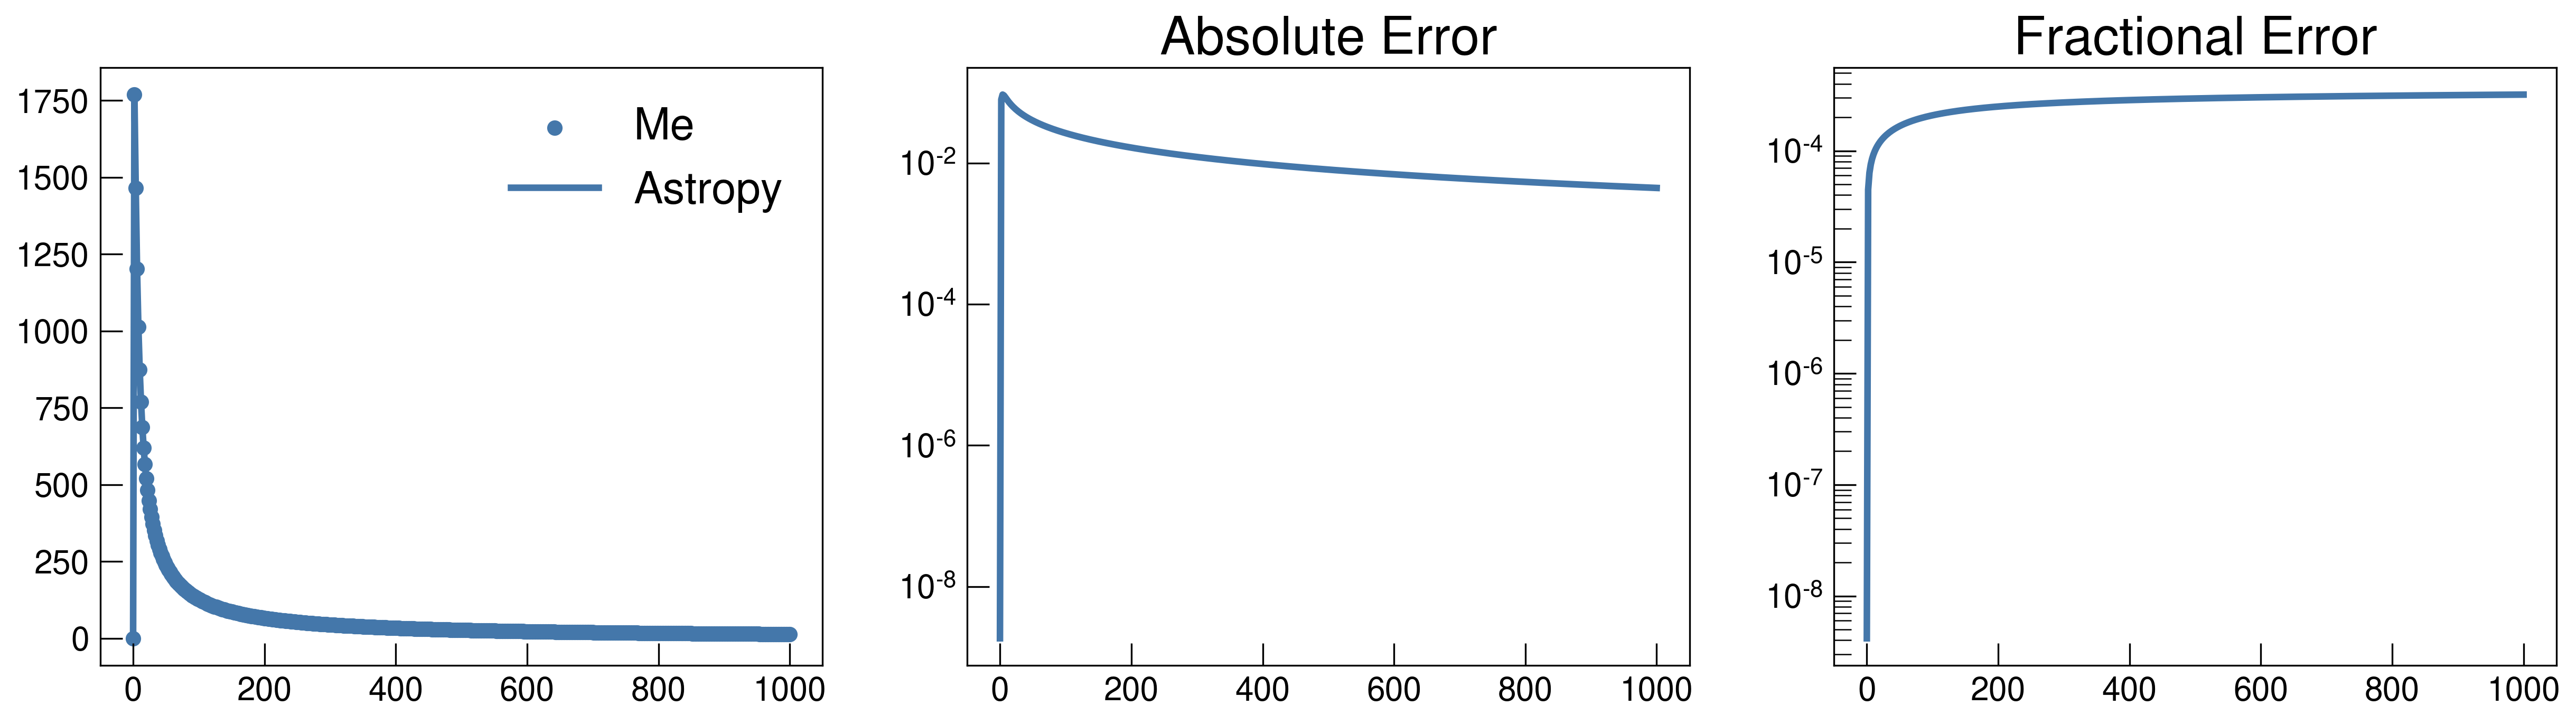

In [18]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

abs_err = np.abs(dist_angdiam_arr - dist_angdiam_astropy)

frac_err = abs_err/dist_angdiam_astropy

ax[0].scatter(z_arr, dist_angdiam_arr, label='Me')
ax[0].plot(z_arr, dist_angdiam_astropy, label='Astropy')
ax[0].legend()

ax[1].plot(z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_title("Absolute Error")

ax[2].plot(z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_title("Fractional Error")

## Test 2 - Comoving Line-of-Sight Distance

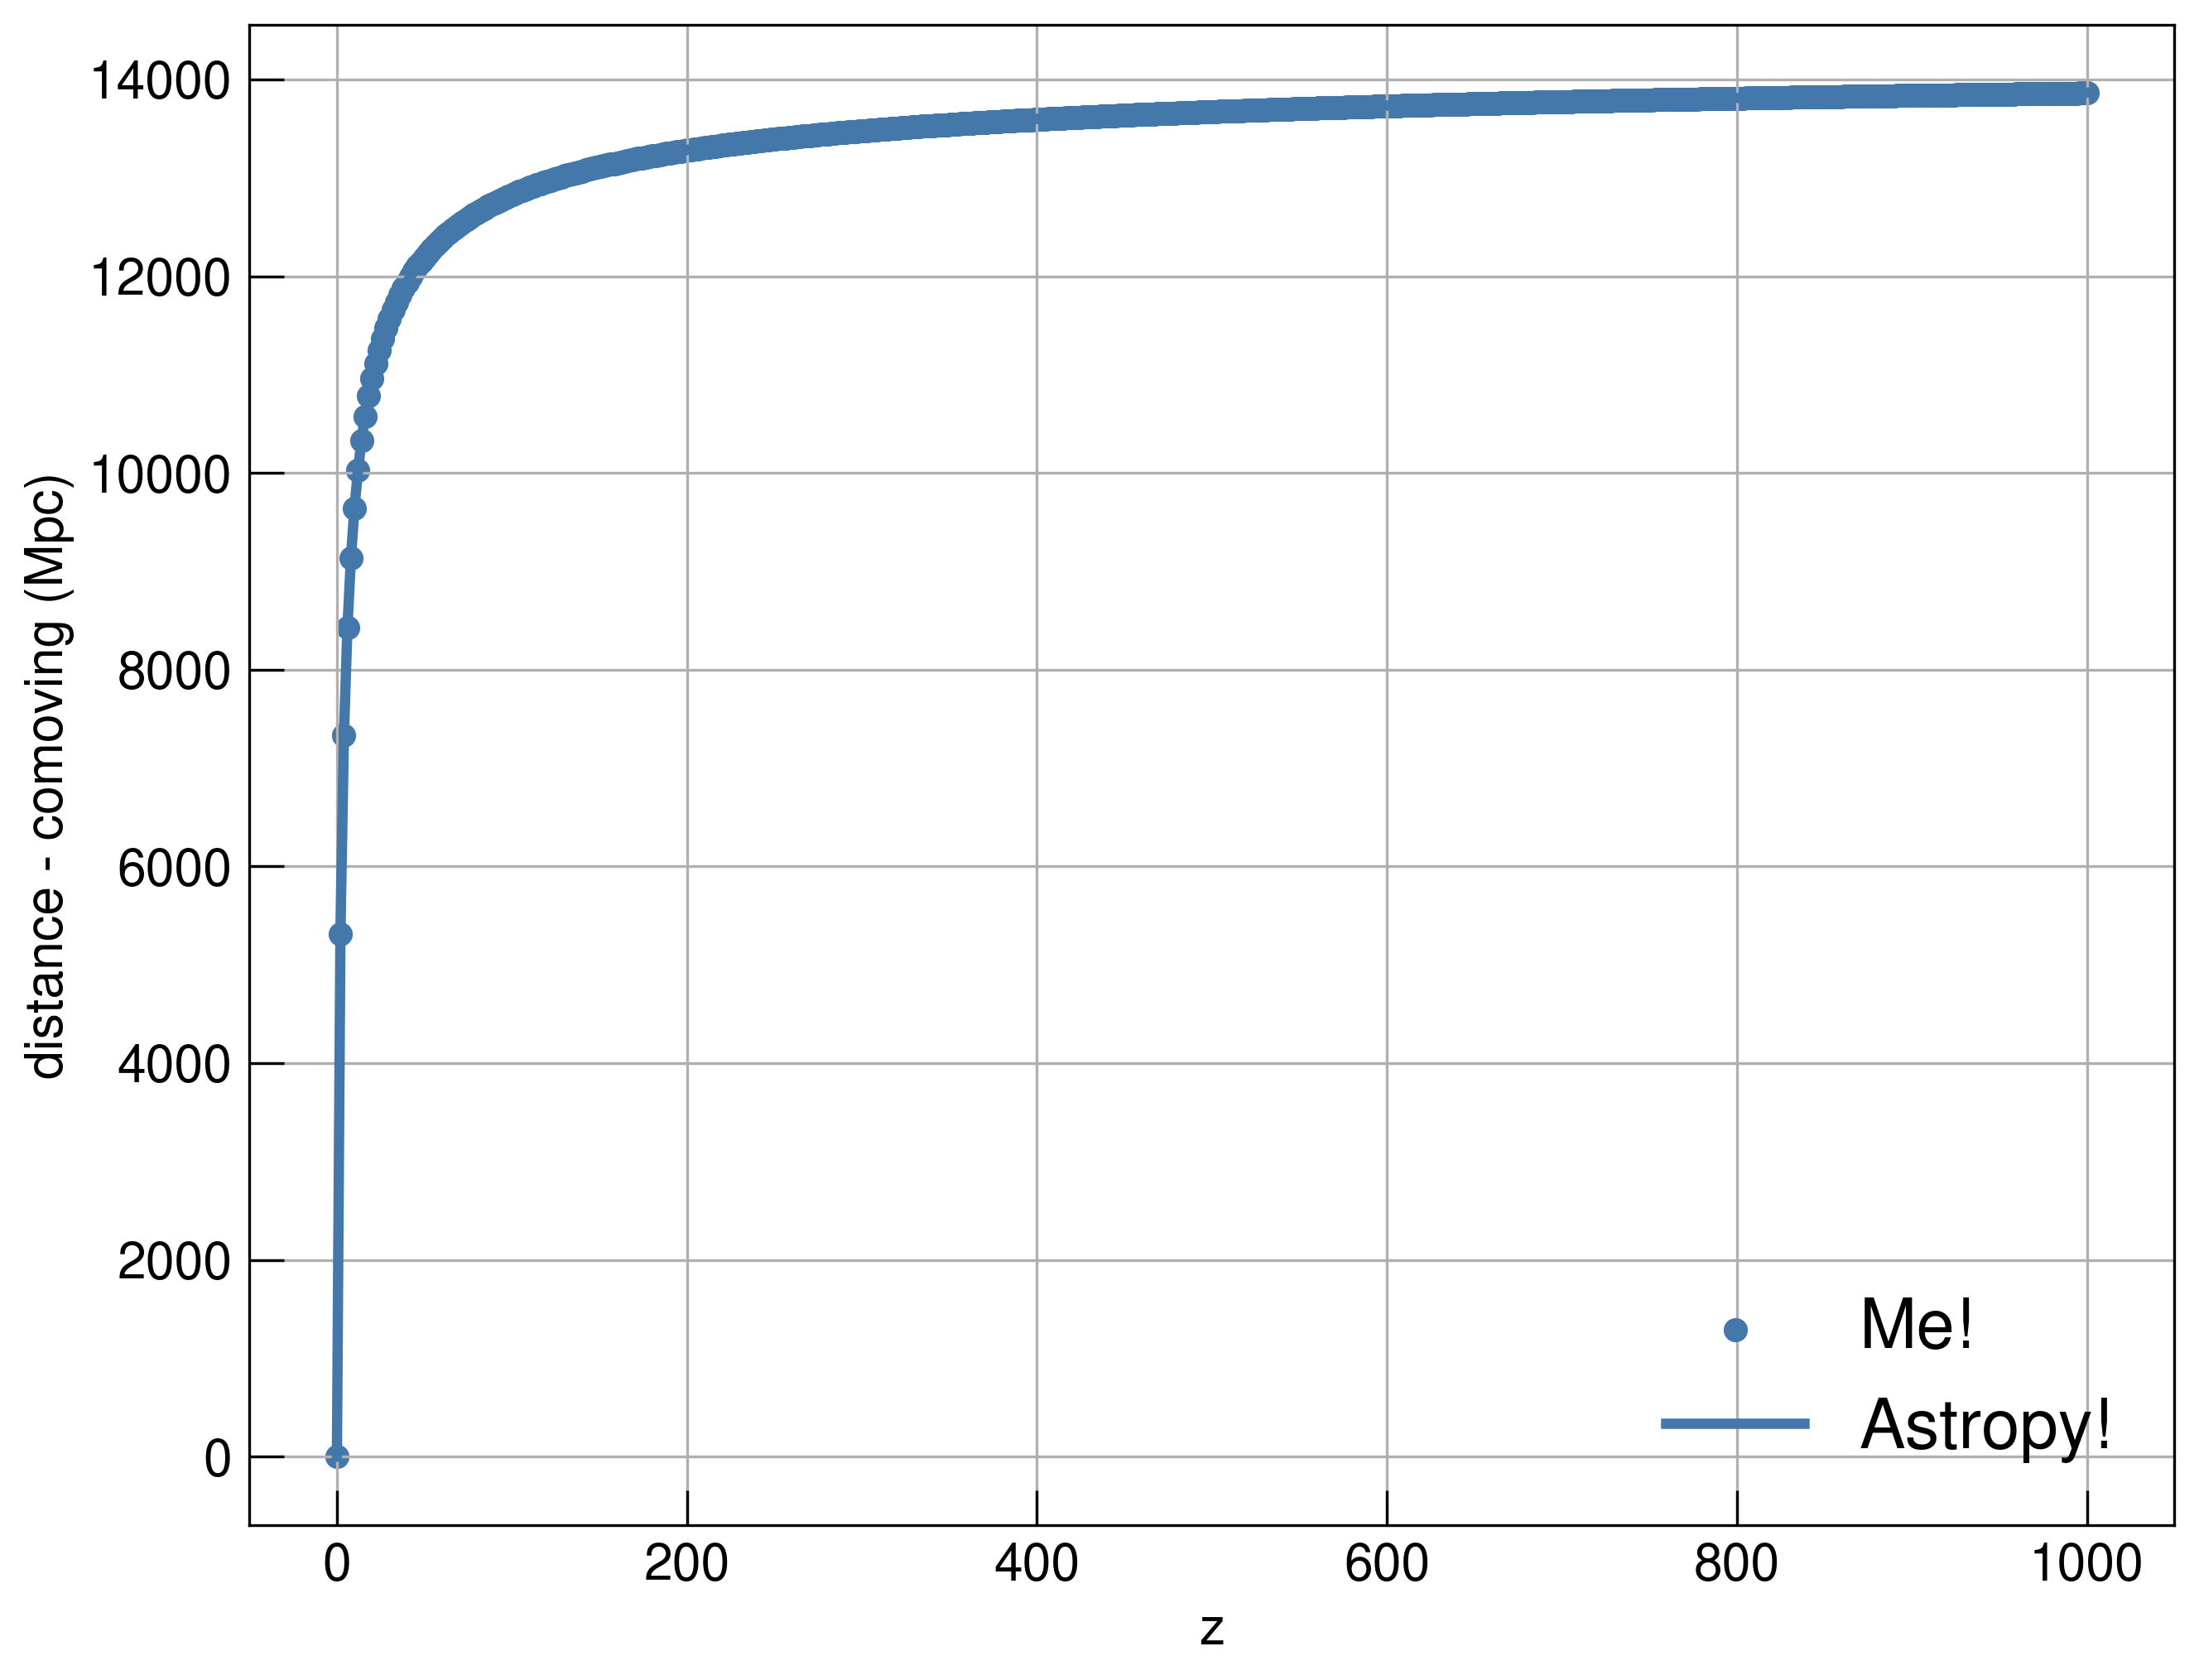

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(z_arr, dist_comov_LOS_arr, label='Me!')
ax.plot(z_arr, dist_comoving_astropy, label='Astropy!')

ax.set_xlabel("z")
ax.set_ylabel("distance - comoving (Mpc)")

ax.grid()

plt.legend()

Text(0.5, 1.0, 'Fractional Error')

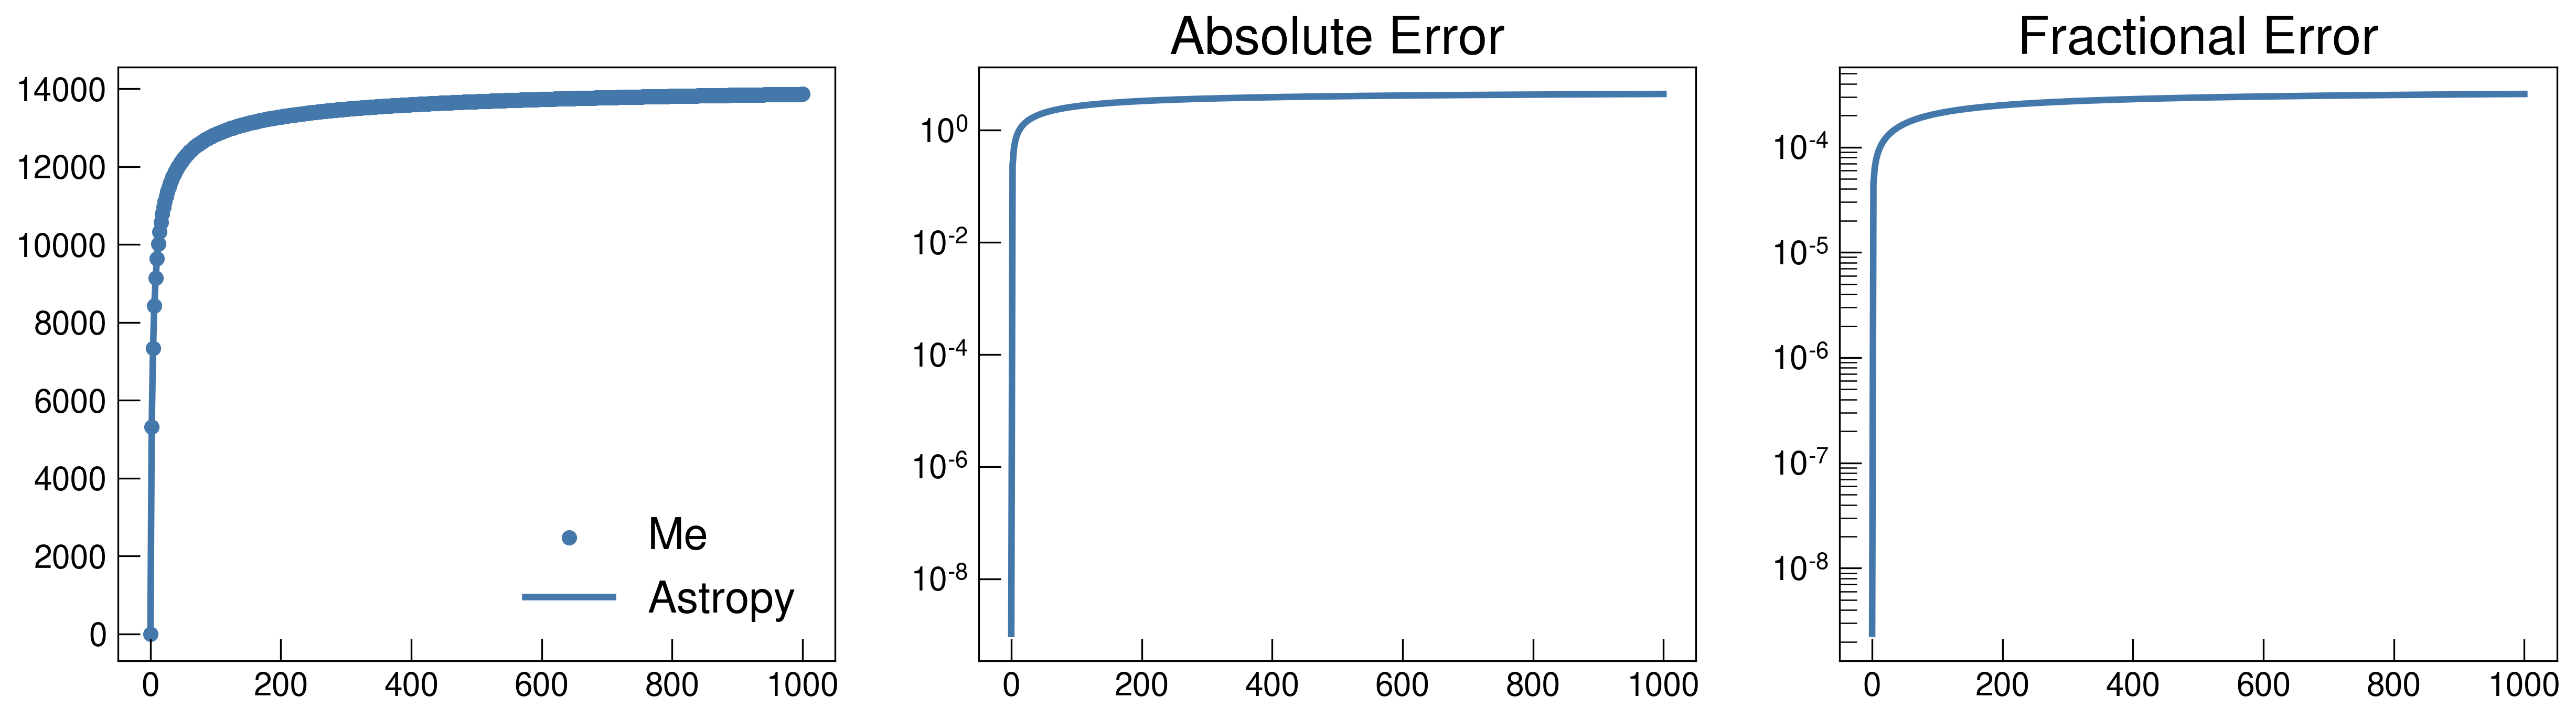

In [20]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

abs_err = np.abs(dist_comov_LOS_arr - dist_comoving_astropy)

frac_err = abs_err/dist_comoving_astropy

ax[0].scatter(z_arr, dist_comov_LOS_arr, label='Me')
ax[0].plot(z_arr, dist_comoving_astropy, label='Astropy')
ax[0].legend()

ax[1].plot(z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_title("Absolute Error")

ax[2].plot(z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_title("Fractional Error")

## Test 3 - Distance Modulus

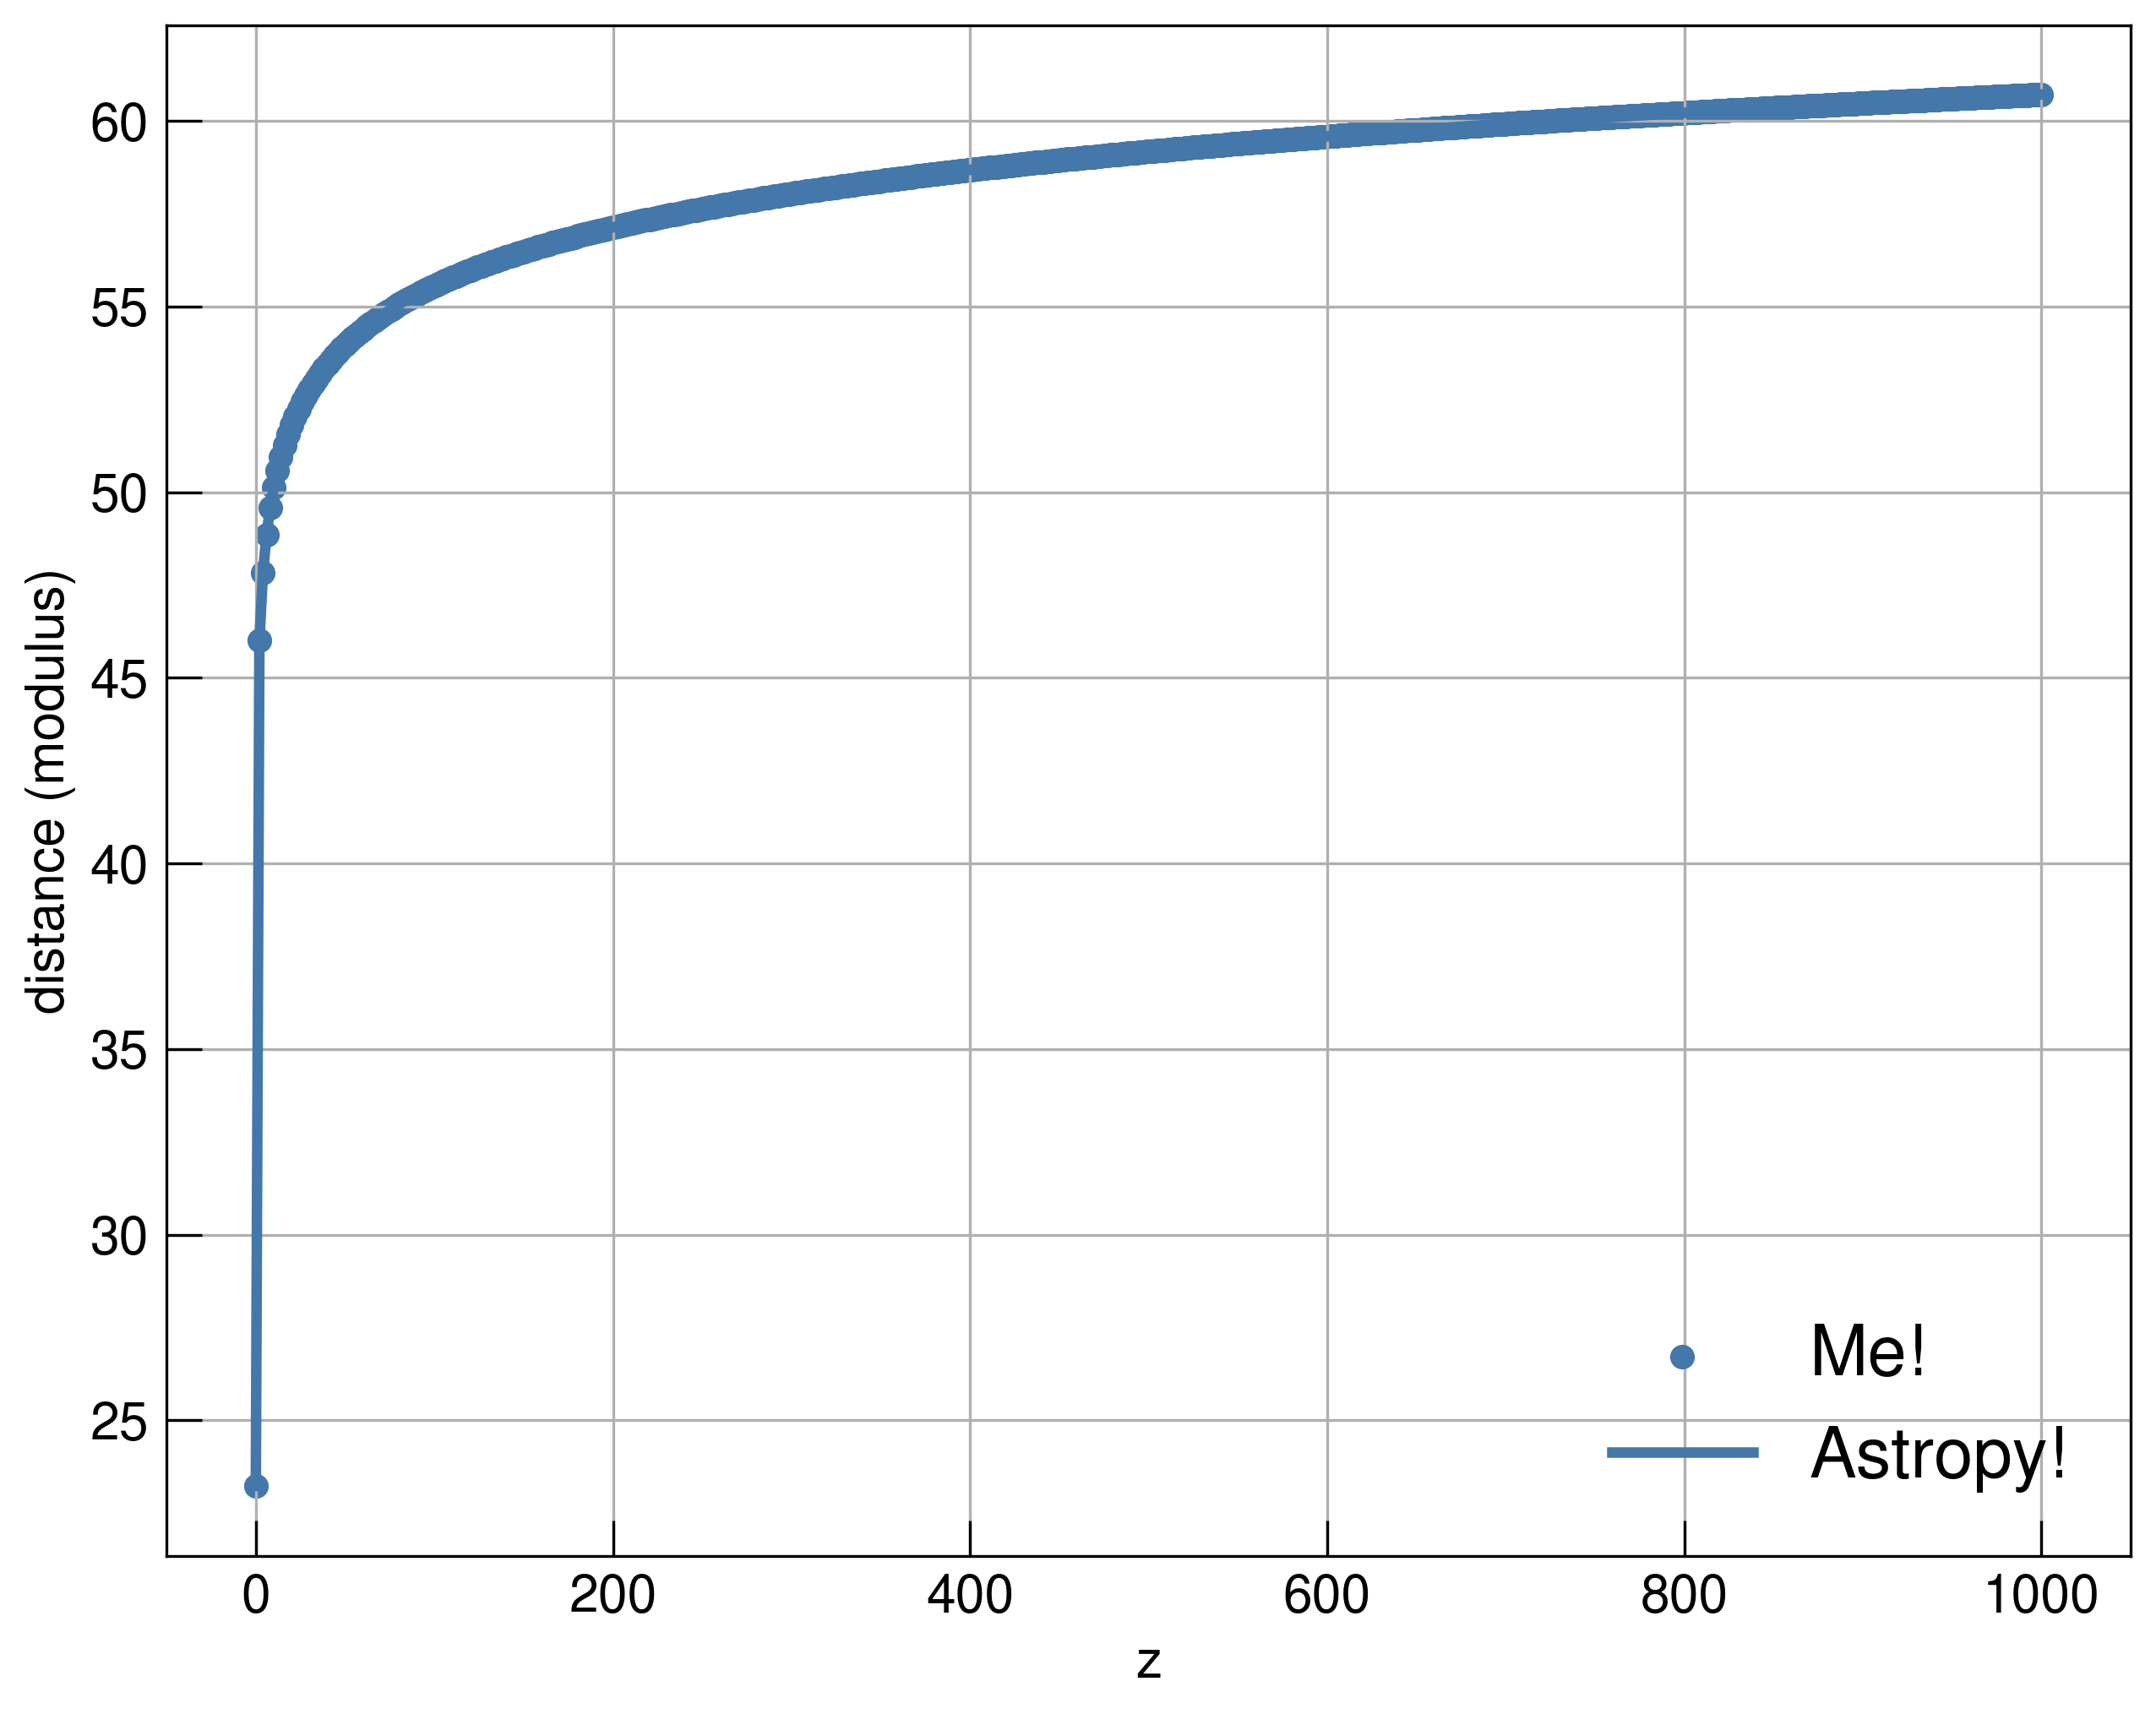

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(z_arr, dist_mod_arr, label='Me!')
ax.plot(z_arr, dist_mod_astropy, label='Astropy!')

ax.set_xlabel("z")
ax.set_ylabel("distance (modulus)")

ax.grid()

plt.legend()

Text(0.5, 1.0, 'Fractional Error')

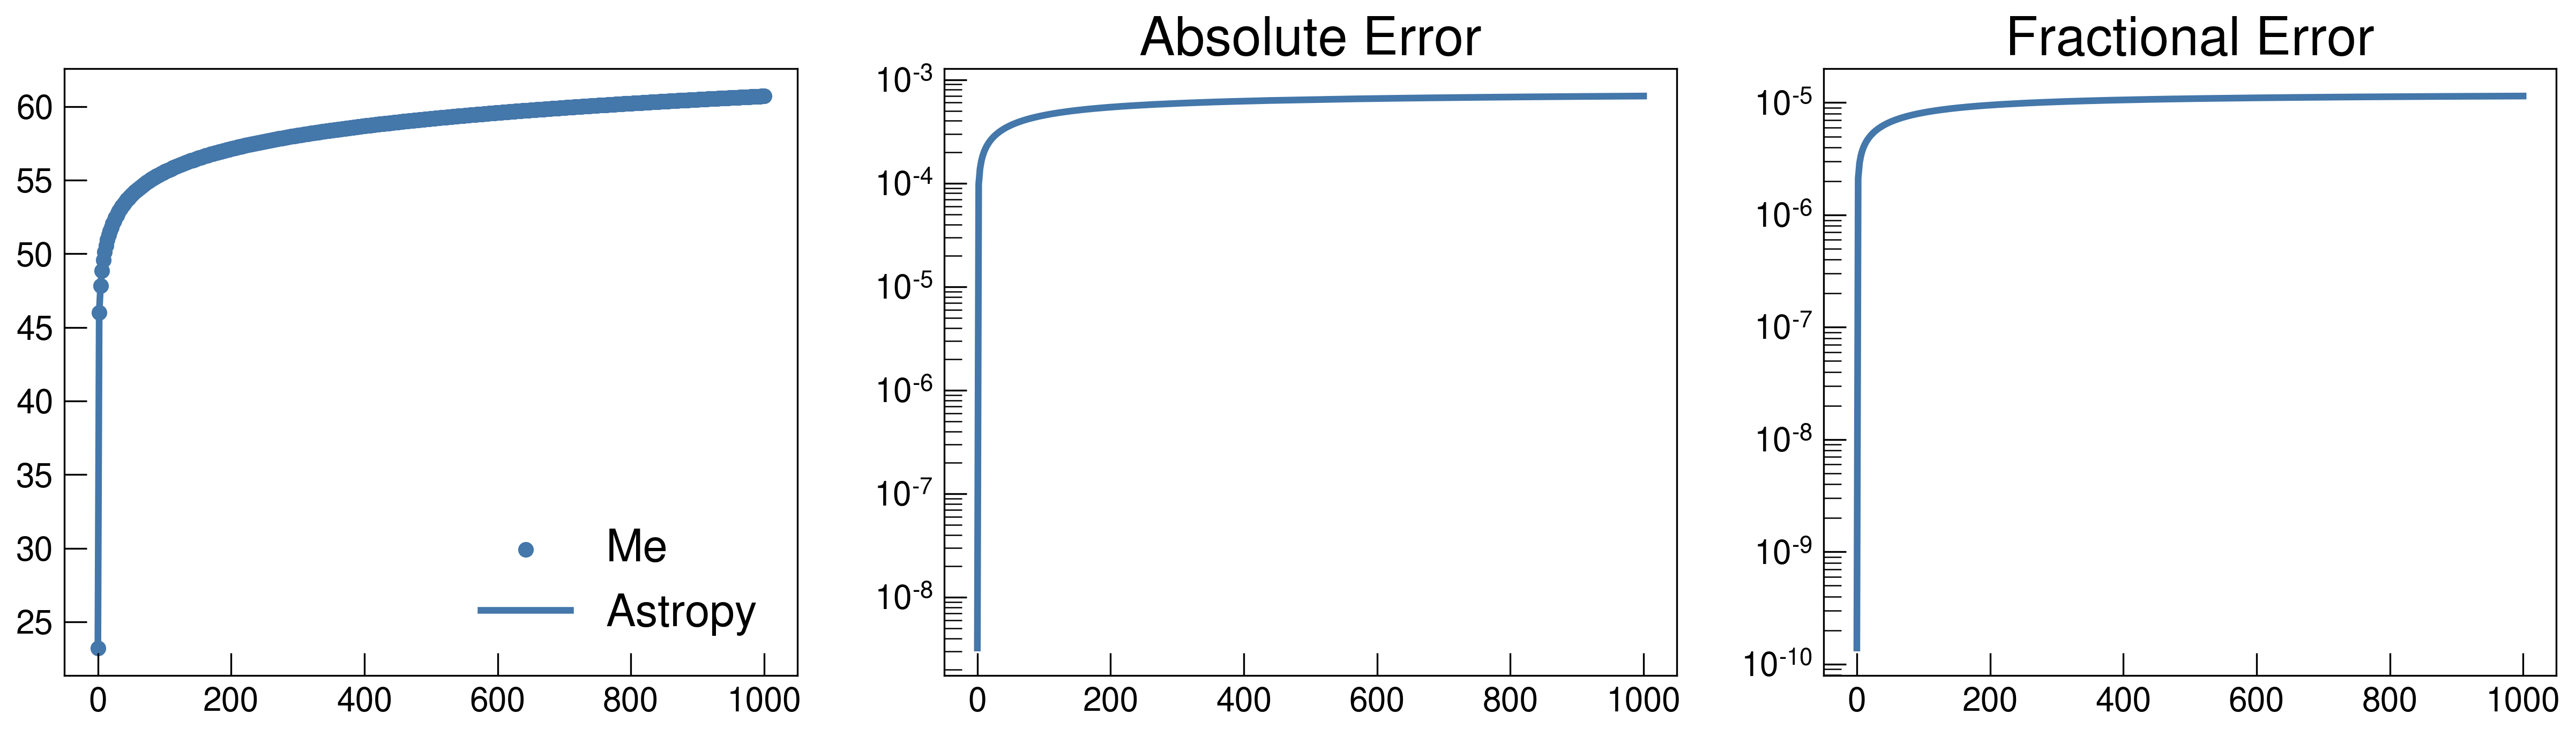

In [22]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

abs_err = np.abs(dist_mod_arr - dist_mod_astropy)

frac_err = abs_err/dist_mod_astropy

ax[0].scatter(z_arr, dist_mod_arr, label='Me')
ax[0].plot(z_arr, dist_mod_astropy, label='Astropy')
ax[0].legend()

ax[1].plot(z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_title("Absolute Error")

ax[2].plot(z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_title("Fractional Error")

## Test 4 - Age of Universe

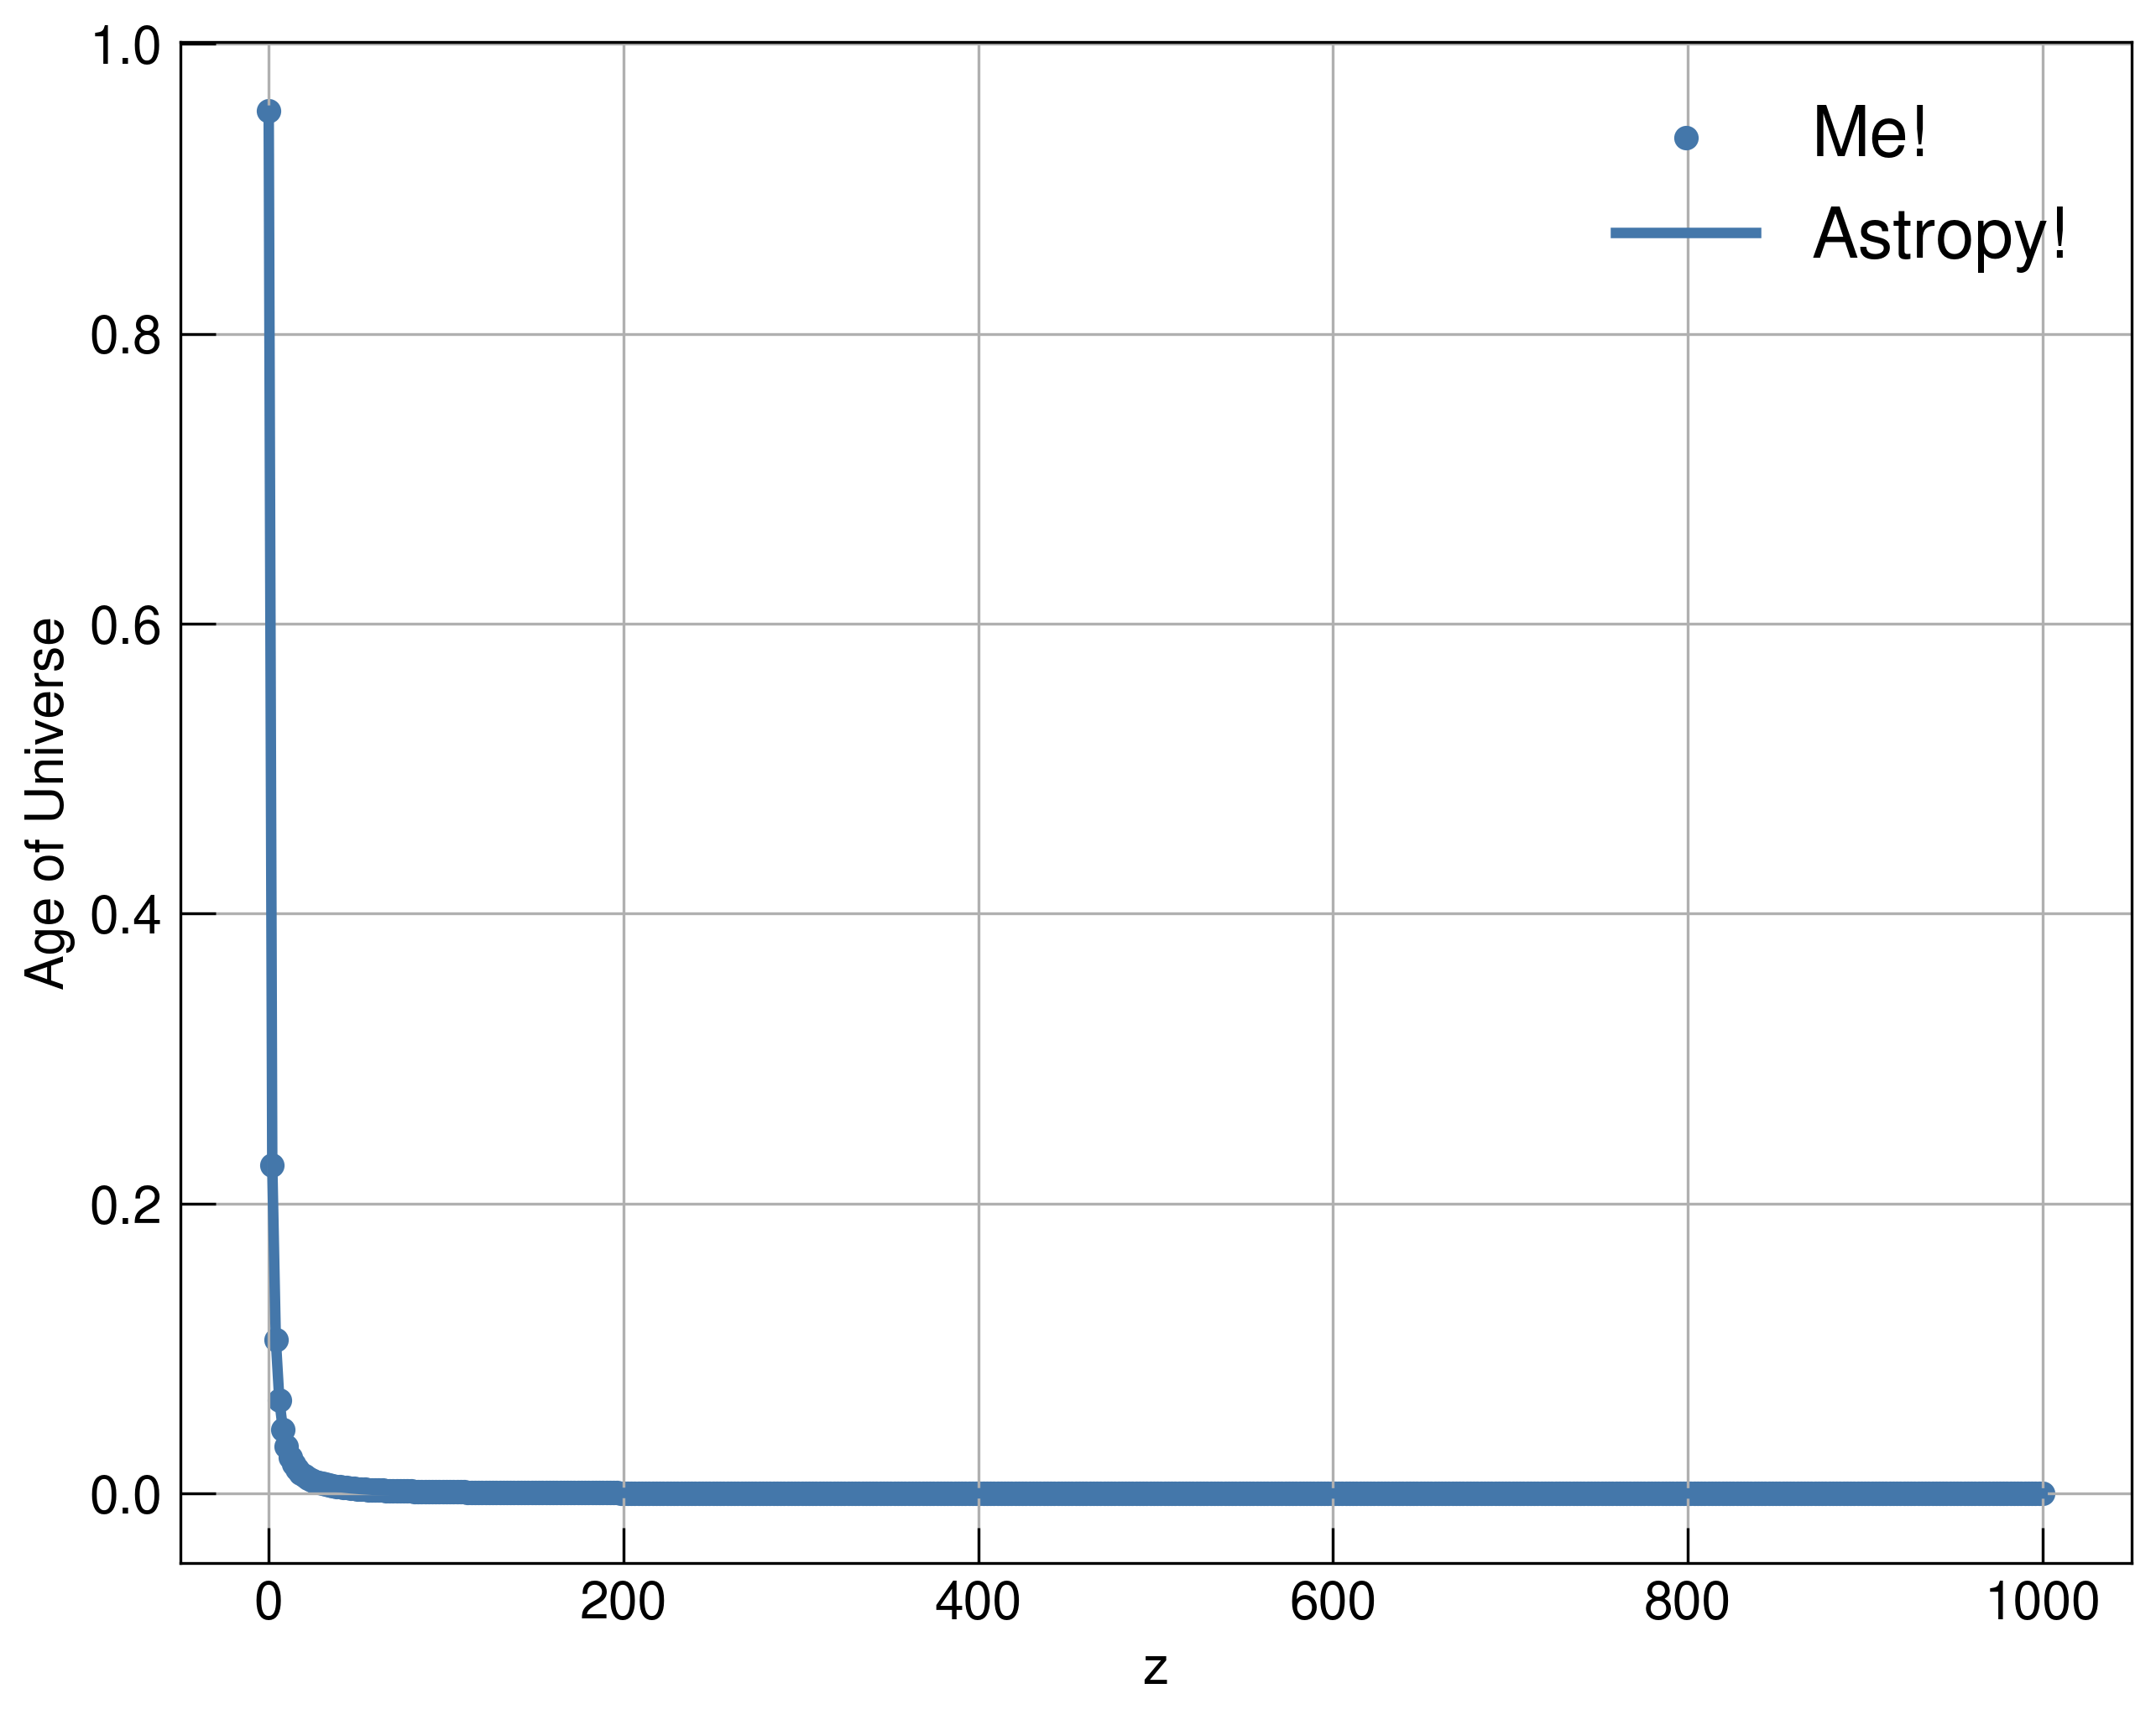

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(z_arr, time_age_arr, label='Me!')
ax.plot(z_arr, time_age_astropy, label='Astropy!')

ax.set_xlabel("z")
ax.set_ylabel("Age of Universe")

ax.grid()

plt.legend()

Text(0.5, 1.0, 'Fractional Error')

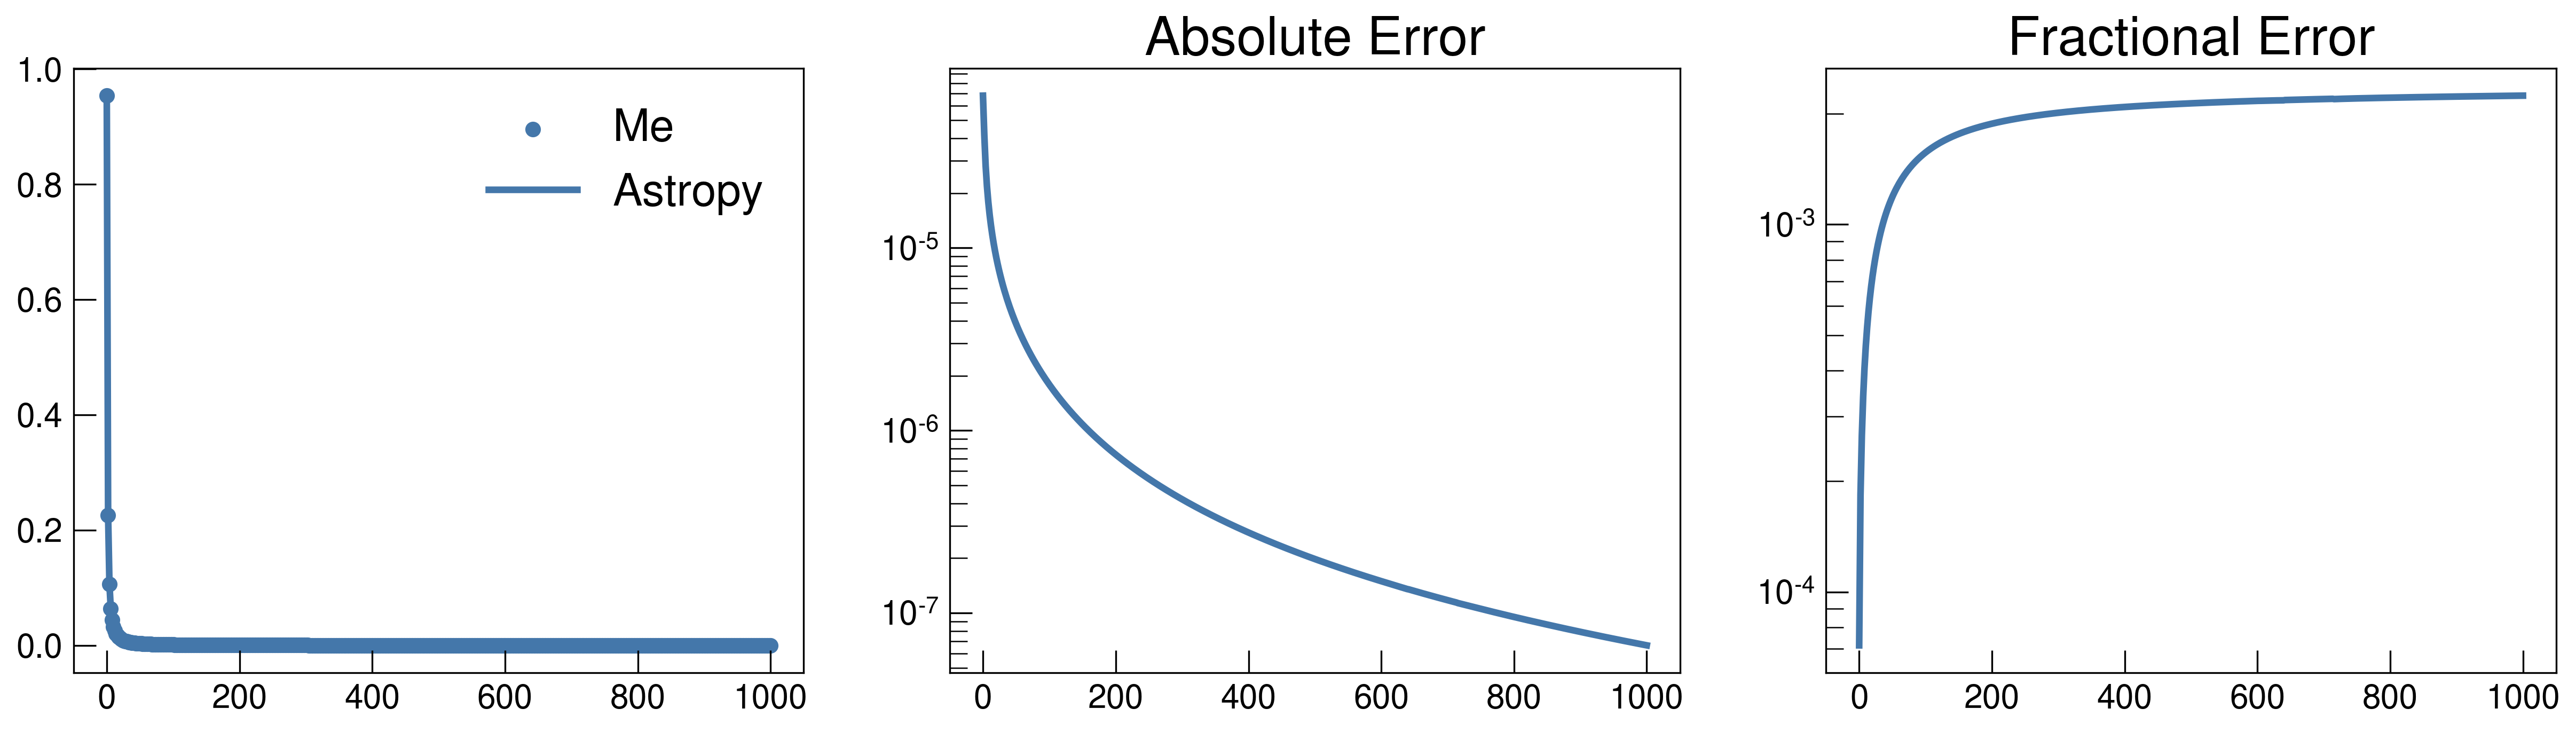

In [24]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

abs_err = np.abs(time_age_arr - time_age_astropy)

frac_err = abs_err/time_age_astropy

ax[0].scatter(z_arr, time_age_arr, label='Me')
ax[0].plot(z_arr, time_age_astropy, label='Astropy')
ax[0].legend()

ax[1].plot(z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_title("Absolute Error")

ax[2].plot(z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_title("Fractional Error")

## Test 5 - Lookback time

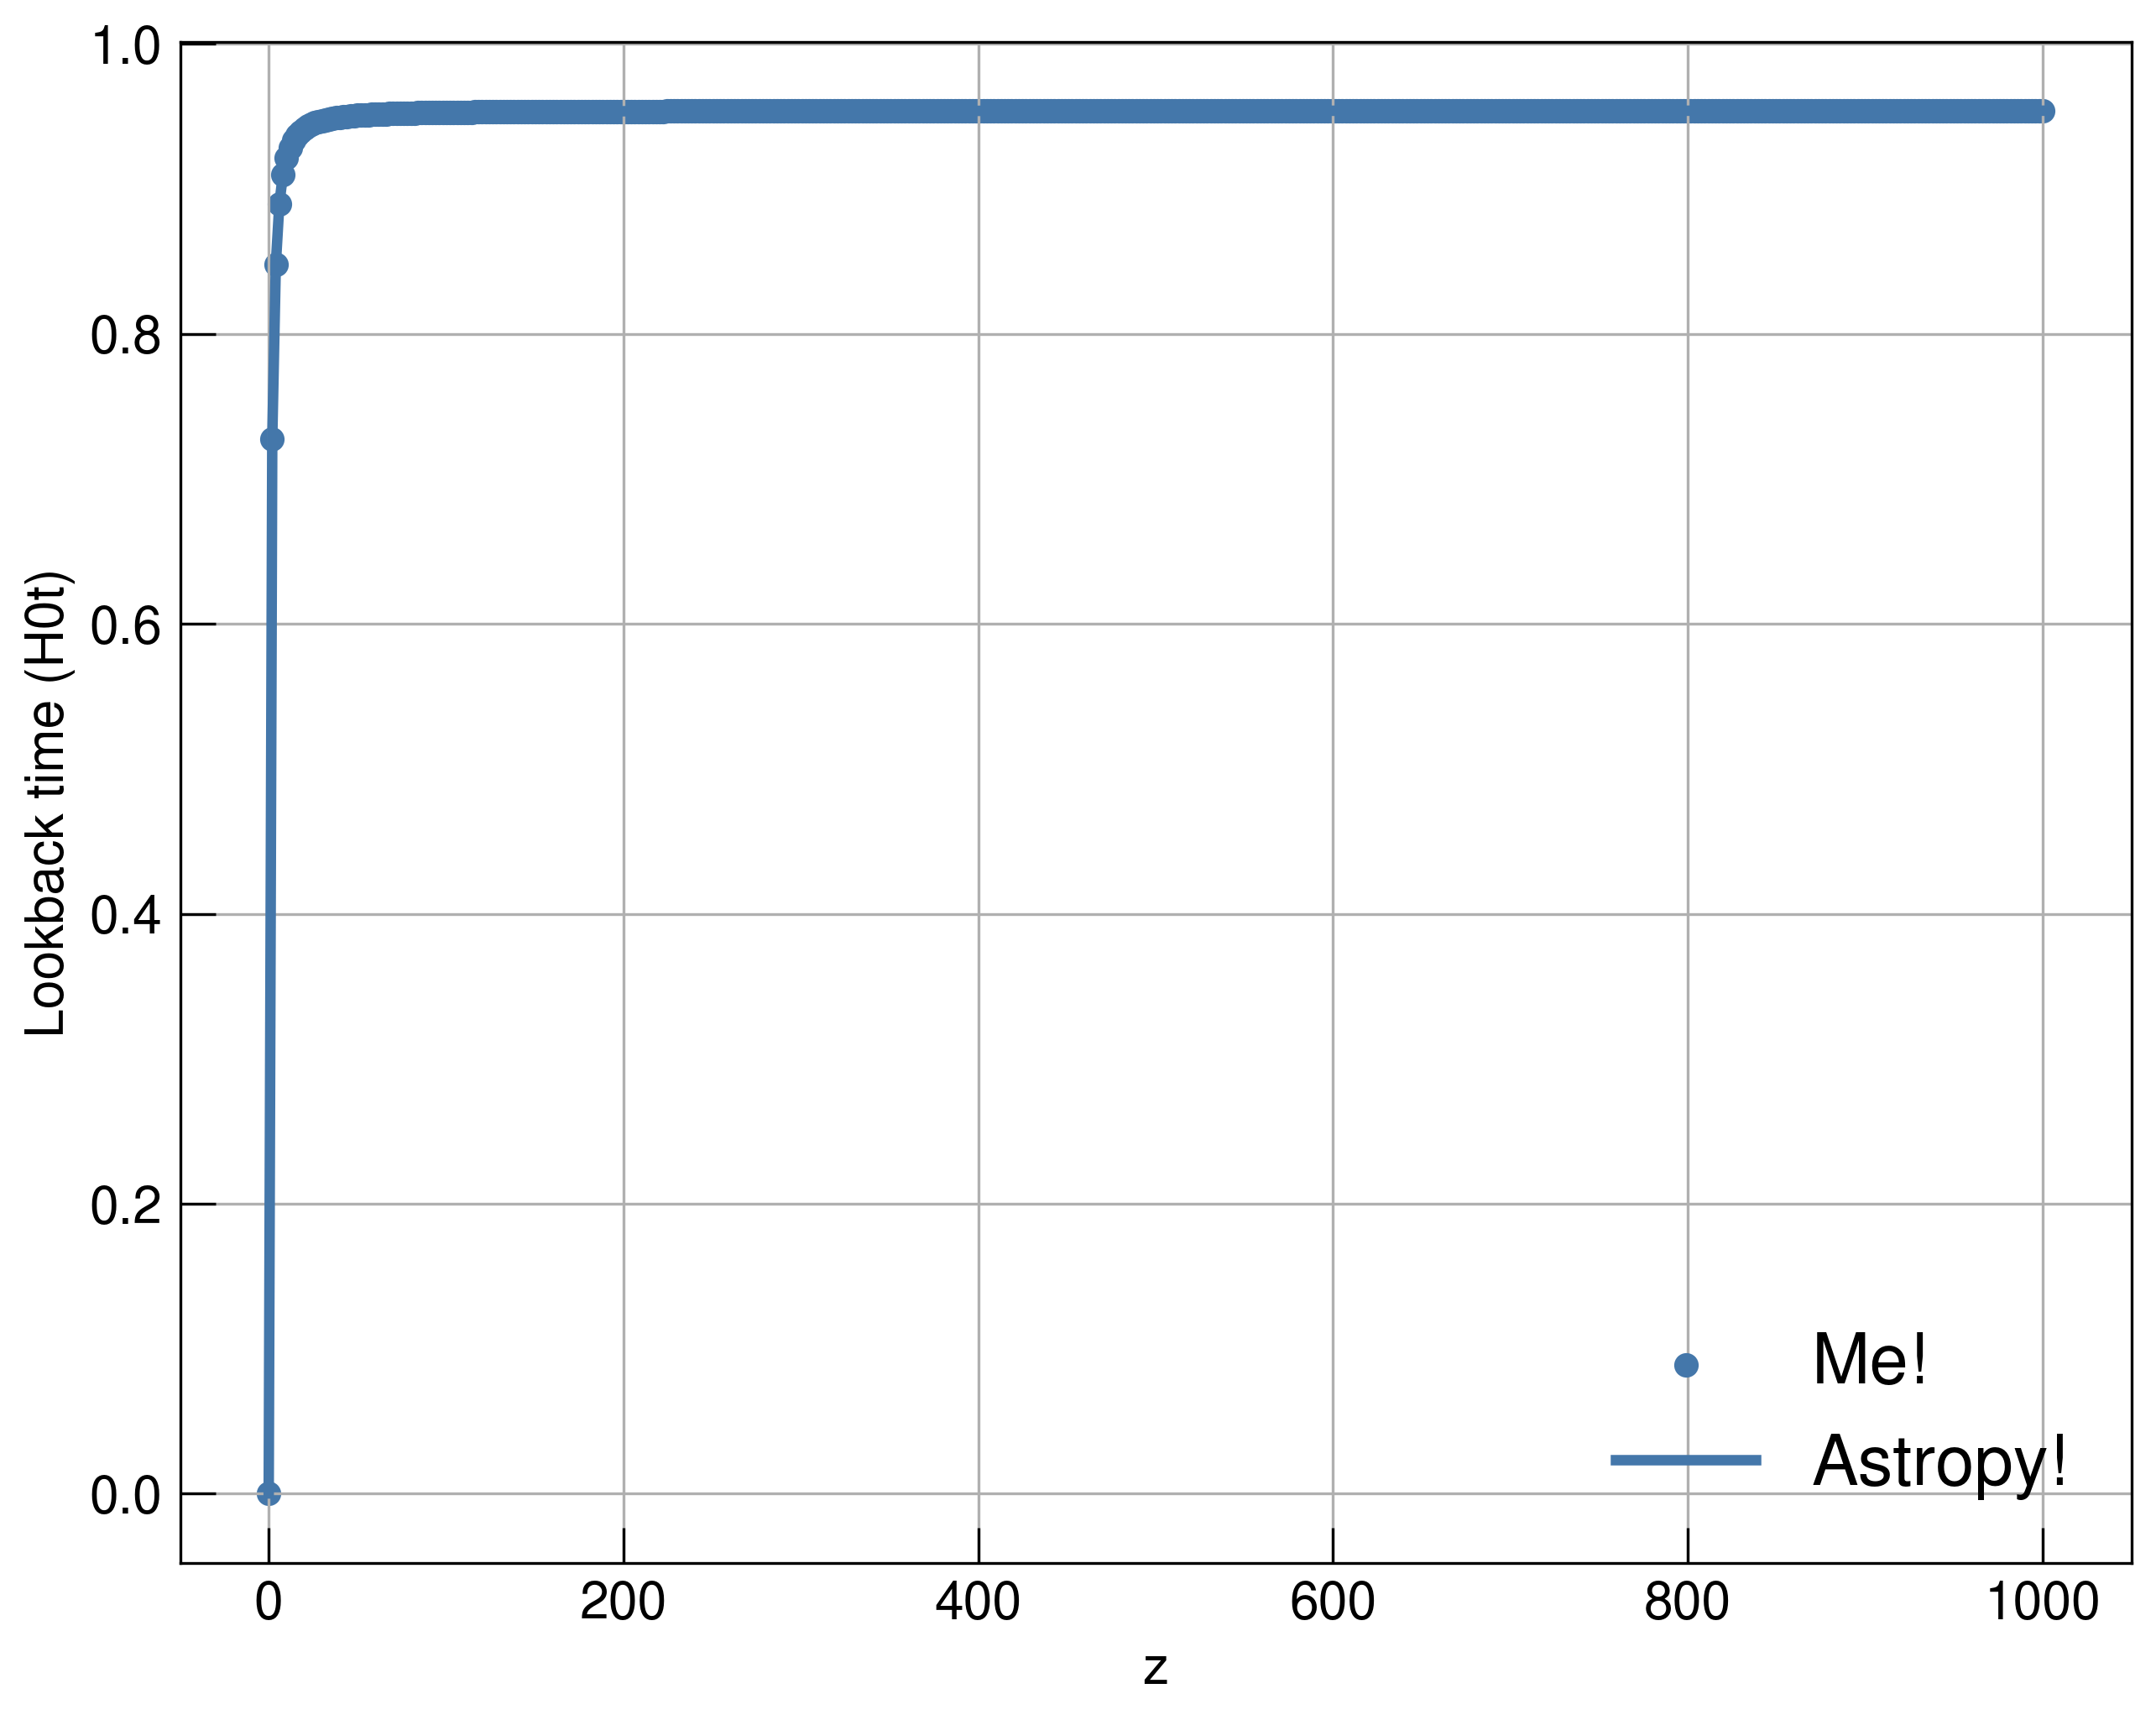

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(z_arr, time_look_arr, label='Me!')
ax.plot(z_arr, time_look_astropy, label='Astropy!')

ax.set_xlabel("z")
ax.set_ylabel("Lookback time (H0t)")

ax.grid()

plt.legend()

Text(0.5, 1.0, 'Fractional Error')

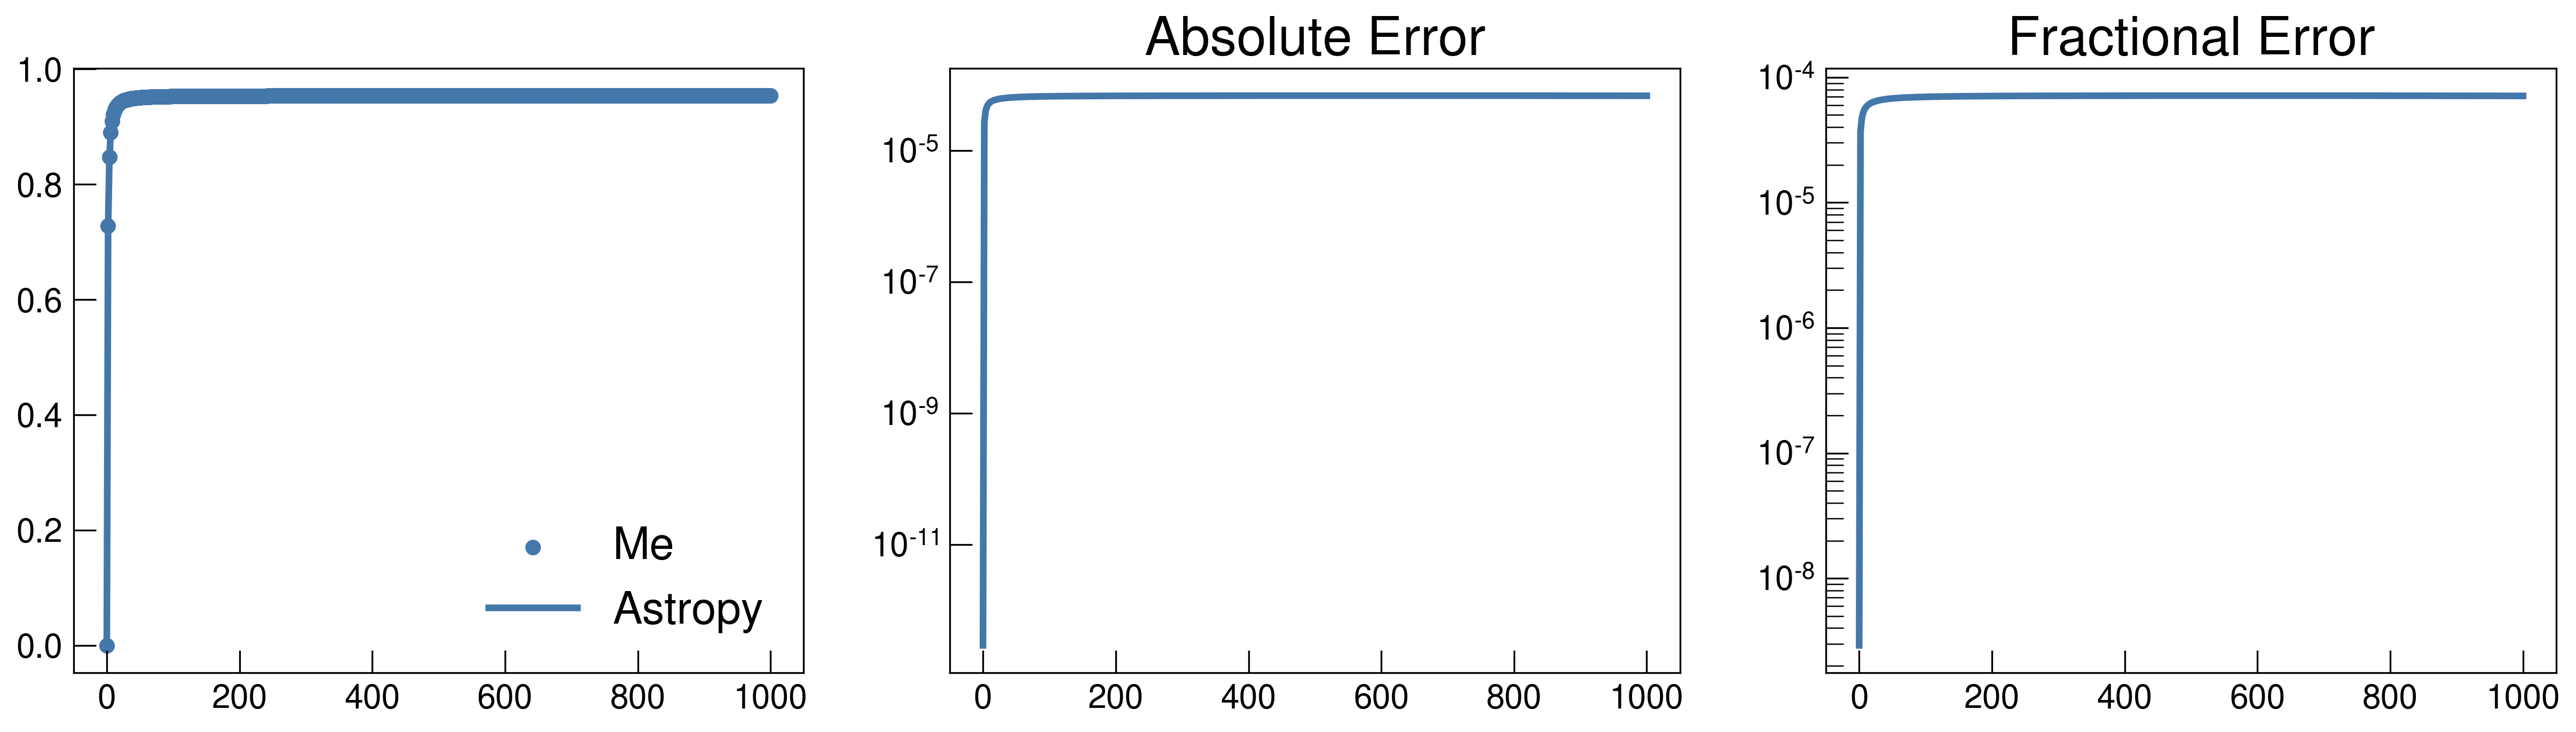

In [26]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

abs_err = np.abs(time_look_arr - time_look_astropy)

frac_err = abs_err/time_look_astropy

ax[0].scatter(z_arr, time_look_arr, label='Me')
ax[0].plot(z_arr, time_look_astropy, label='Astropy')
ax[0].legend()

ax[1].plot(z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_title("Absolute Error")

ax[2].plot(z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_title("Fractional Error")

## Test 6 - Lookback Time and Scale Factor

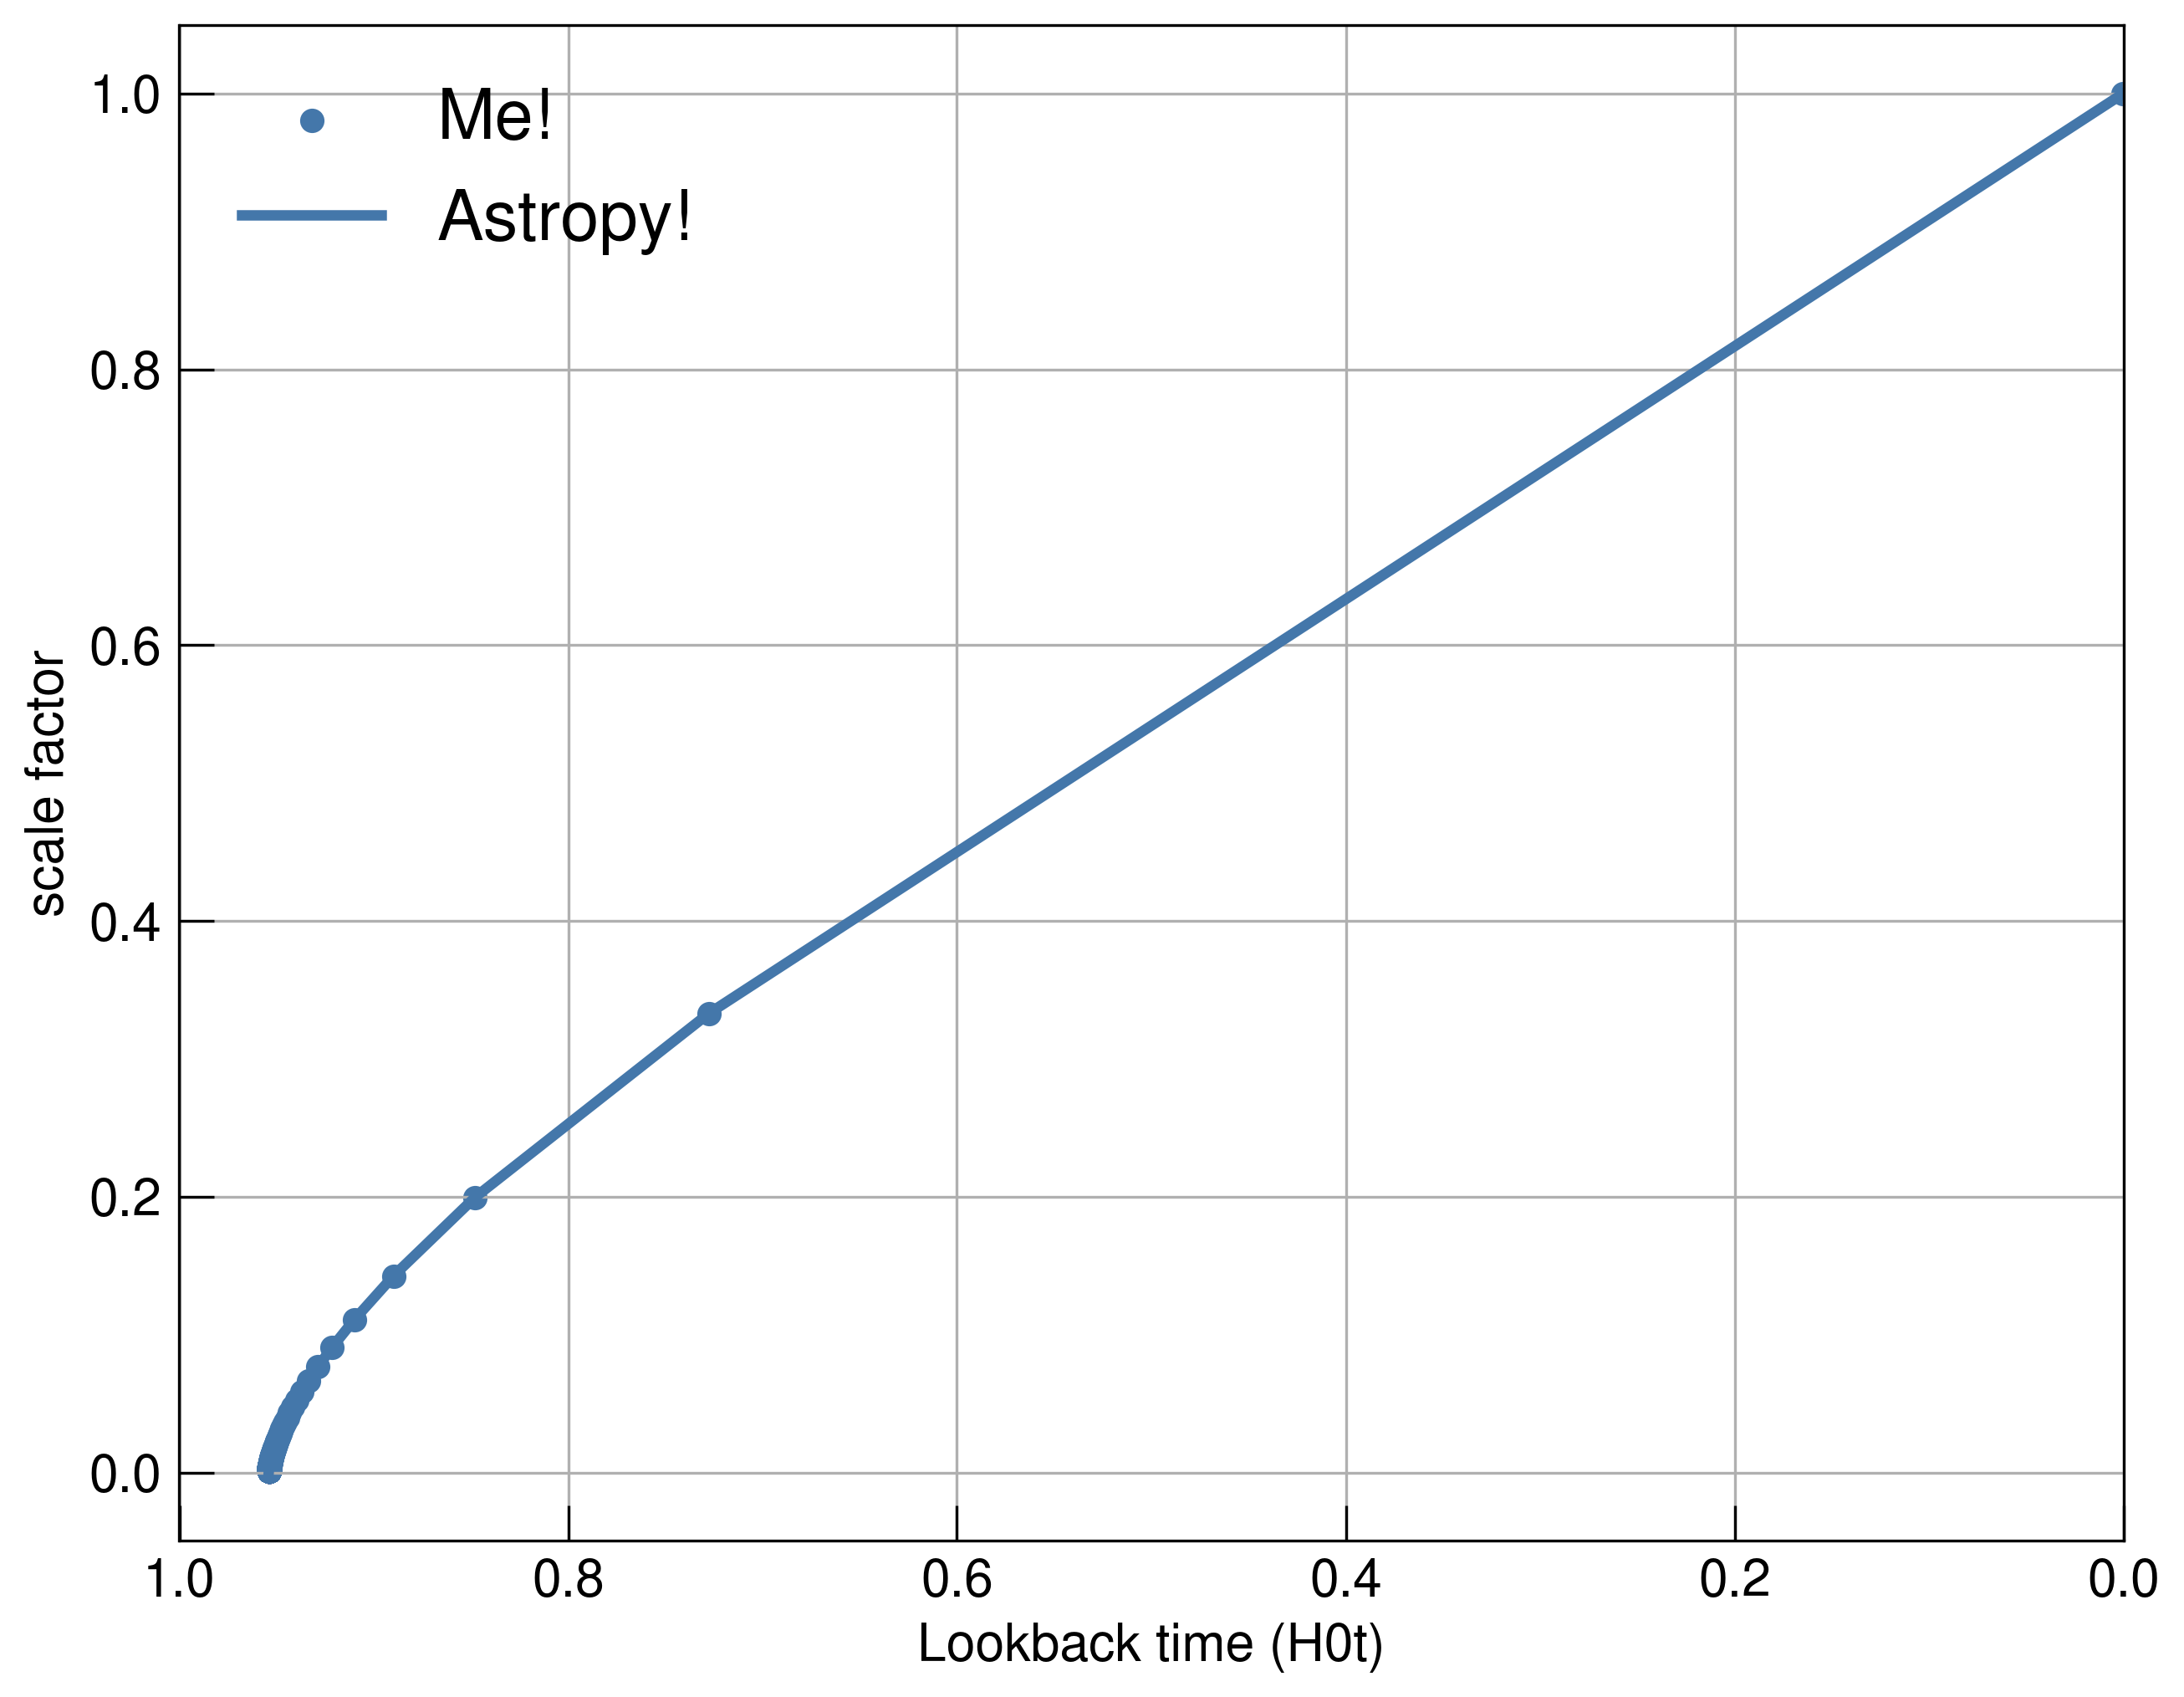

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(time_look_arr, a_arr, label='Me!')
ax.plot(time_look_astropy, a_arr_astropy, label='Astropy!')

ax.set_xlabel("Lookback time (H0t)")
ax.set_ylabel("scale factor")

ax.set_xlim(1.0,0.)

ax.grid()

plt.legend()

(1.0, 0.0)

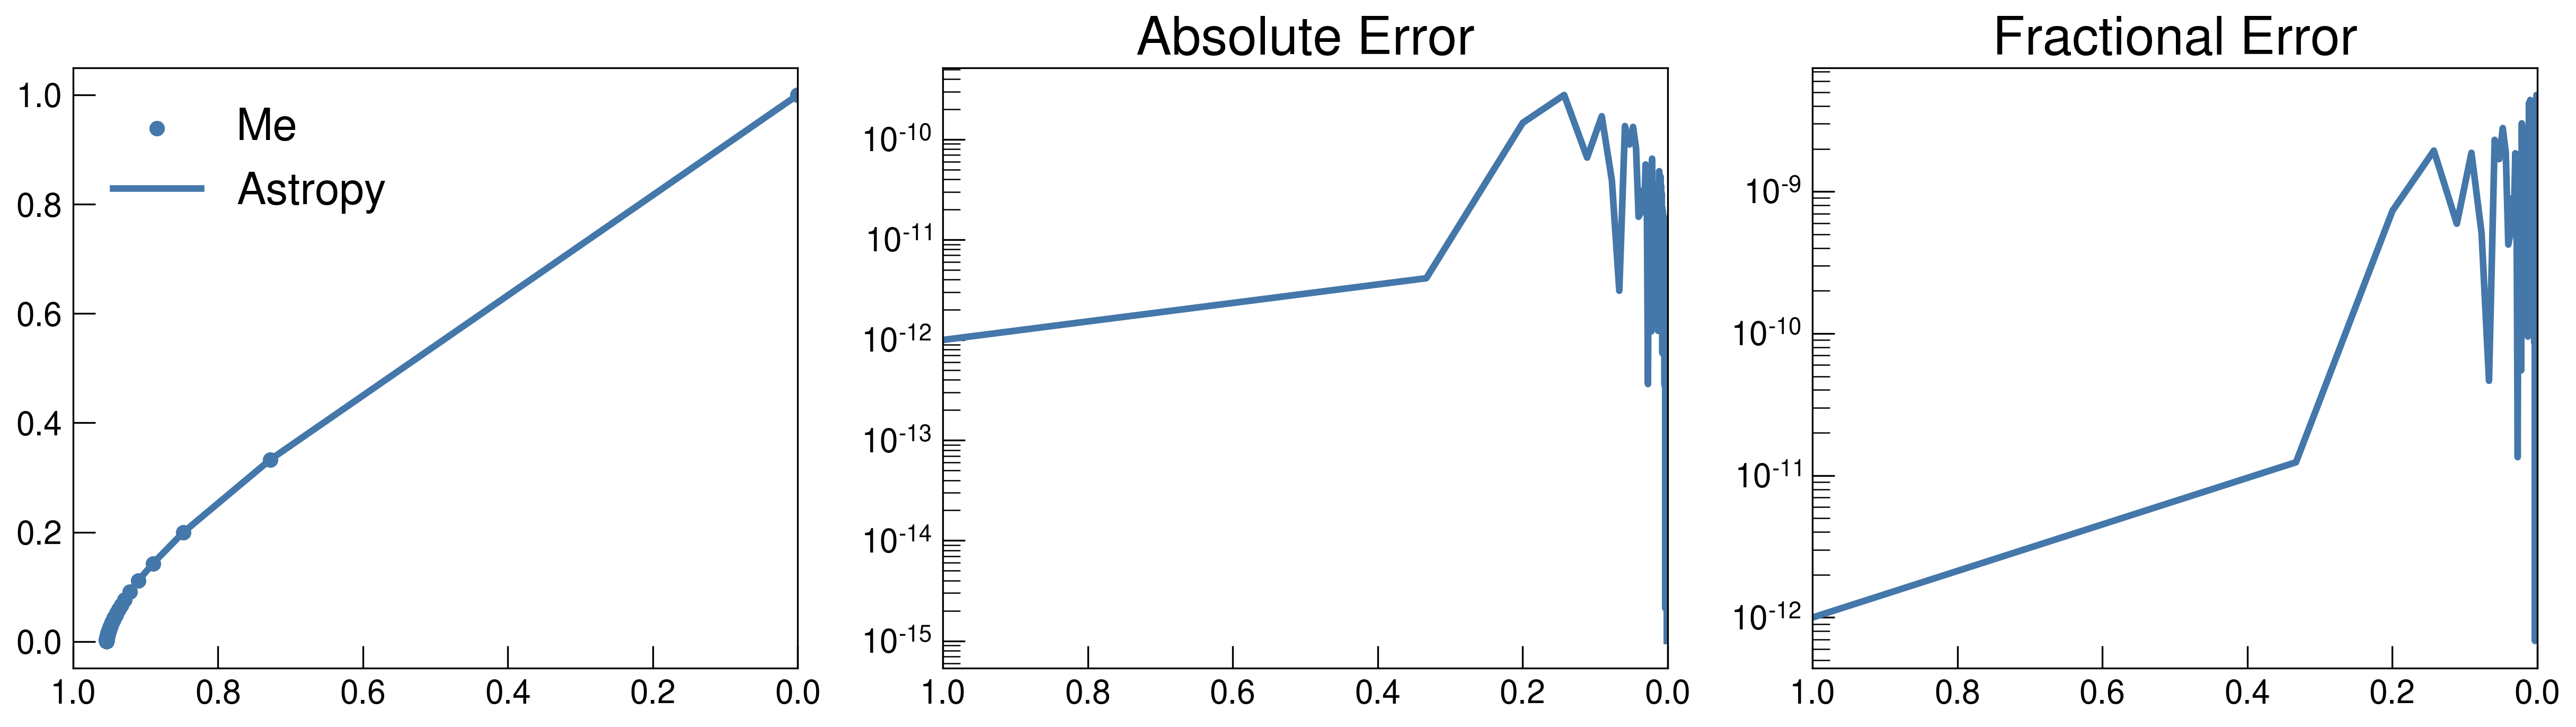

In [28]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

abs_err = np.abs(a_arr - a_arr_astropy)

frac_err = abs_err/a_arr_astropy

ax[0].scatter(time_look_arr, a_arr, label='Me')
ax[0].plot(time_look_astropy, a_arr_astropy, label='Astropy')
ax[0].legend()
ax[0].set_xlim(1.0,0.)

ax[1].plot(a_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_title("Absolute Error")
ax[1].set_xlim(1.0,0.)

ax[2].plot(a_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_title("Fractional Error")
ax[2].set_xlim(1.0,0.)